In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stations = pd.read_csv("CREMP_Stations_2023.csv")

In [3]:
stations.head()

,OID_,Region,Site_Code,SiteID,Site_name,Habitat,Subregion,StationID,First_Year_surveyed,length_m,Depth_ft,latDD,lonDD,latDeg,latMin,lonDeg,lonMin
0,29,FKNMS,9H1,10,Rattlesnake,HB,UK,101,1996,23,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
1,30,FKNMS,9H1,10,Rattlesnake,HB,UK,102,1996,22,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
2,31,FKNMS,9H1,10,Rattlesnake,HB,UK,103,1996,23,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
3,32,FKNMS,9H1,10,Rattlesnake,HB,UK,104,1996,25,6,25.1736,-80.3475,25.0,10.416,-80.0,20.850
4,33,FKNMS,9H2,11,El Radabob,HB,UK,111,1996,22,9,25.1201,-80.3782,25.0,7.206,-80.0,22.692


In [4]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OID_                 184 non-null    int64  
 1   Region               184 non-null    object 
 2   Site_Code            184 non-null    object 
 3   SiteID               184 non-null    int64  
 4   Site_name            184 non-null    object 
 5   Habitat              184 non-null    object 
 6   Subregion            184 non-null    object 
 7   StationID            184 non-null    int64  
 8   First_Year_surveyed  184 non-null    int64  
 9   length_m             184 non-null    int64  
 10  Depth_ft             184 non-null    int64  
 11  latDD                184 non-null    float64
 12  lonDD                184 non-null    float64
 13  latDeg               184 non-null    float64
 14  latMin               184 non-null    float64
 15  lonDeg               184 non-null    flo

<Figure size 1000x800 with 0 Axes>

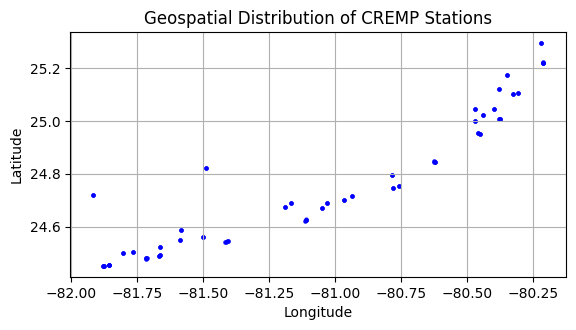

In [5]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(stations['lonDD'], stations['latDD'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry)

# Plot the map
plt.figure(figsize=(10, 8))
gdf.plot(marker='o', color='b', markersize=5, alpha=0.6)
plt.title("Geospatial Distribution of CREMP Stations")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

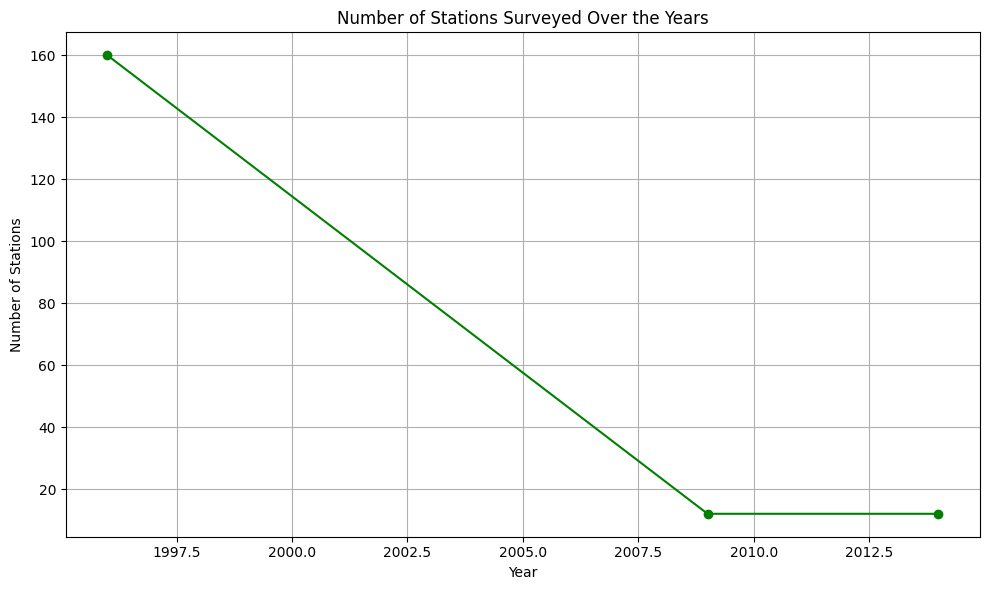

In [6]:
# Survey Coverage Over Time

# Count the number of stations surveyed each year
stations_yearly = stations.groupby('First_Year_surveyed').size()

# Plot the number of stations surveyed over the years
plt.figure(figsize=(10, 6))
stations_yearly.plot(kind='line', marker='o', color='green')
plt.title("Number of Stations Surveyed Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Stations")
plt.grid(True)
plt.tight_layout()
plt.show()

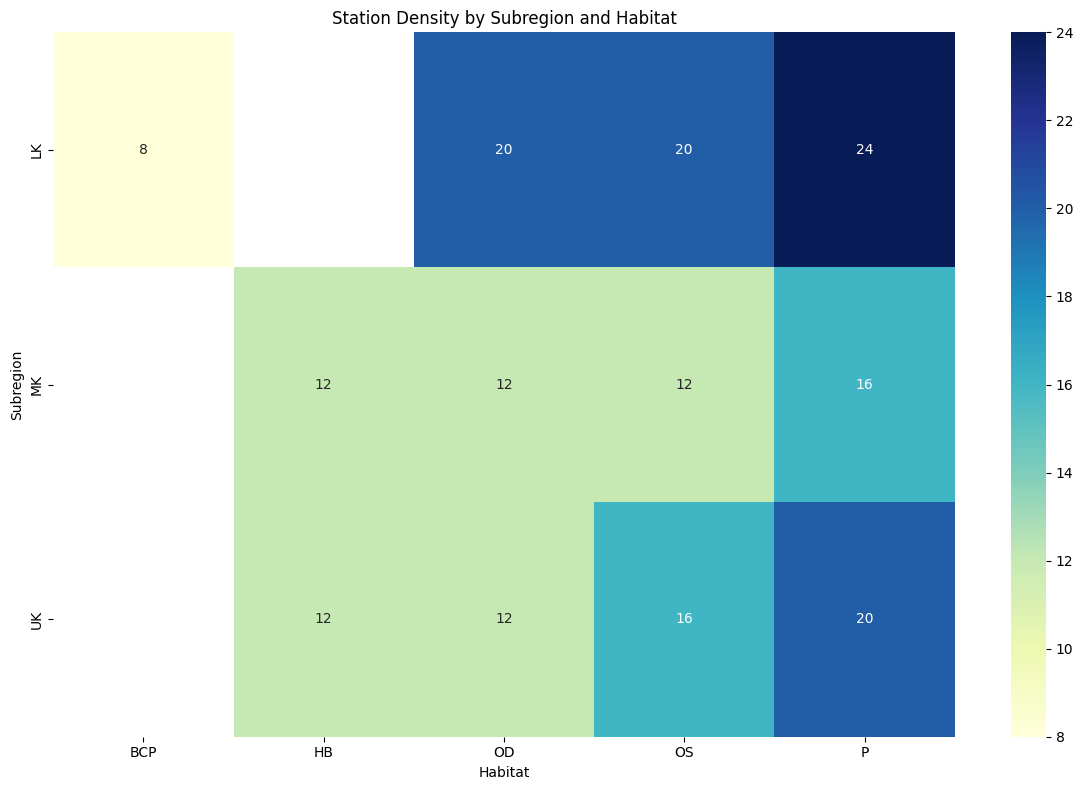

In [7]:
# Station Density Analysis

# Count the number of stations by subregion and habitat
stations_density = stations.groupby(['Subregion', 'Habitat']).size().unstack()

# Plot the station density heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(stations_density, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Station Density by Subregion and Habitat")
plt.xlabel("Habitat")
plt.ylabel("Subregion")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

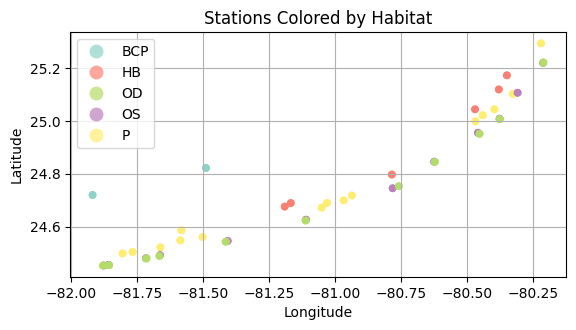

In [8]:
# Color stations based on Habitat
plt.figure(figsize=(10, 8))
gdf.plot(column='Habitat', cmap='Set3', legend=True, markersize=20, alpha=0.7)
plt.title("Stations Colored by Habitat")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


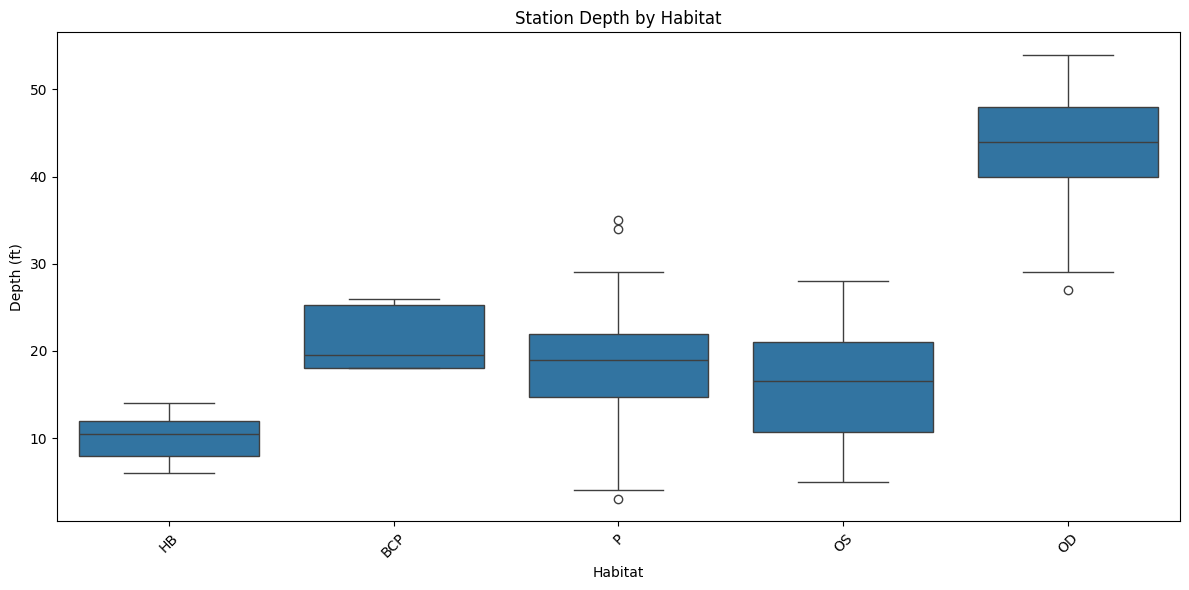

In [9]:
# Boxplot of Depth by Habitat
plt.figure(figsize=(12, 6))
sns.boxplot(x='Habitat', y='Depth_ft', data=stations)
plt.title("Station Depth by Habitat")
plt.xlabel("Habitat")
plt.ylabel("Depth (ft)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

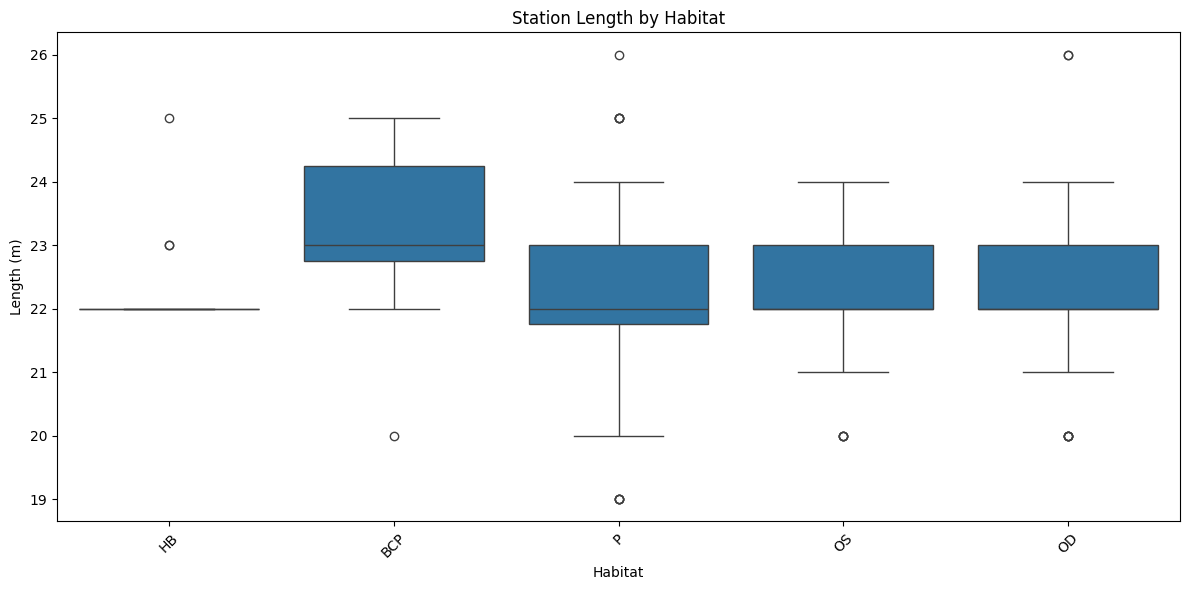

In [10]:
# Boxplot of Length by Habitat
plt.figure(figsize=(12, 6))
sns.boxplot(x='Habitat', y='length_m', data=stations)
plt.title("Station Length by Habitat")
plt.xlabel("Habitat")
plt.ylabel("Length (m)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


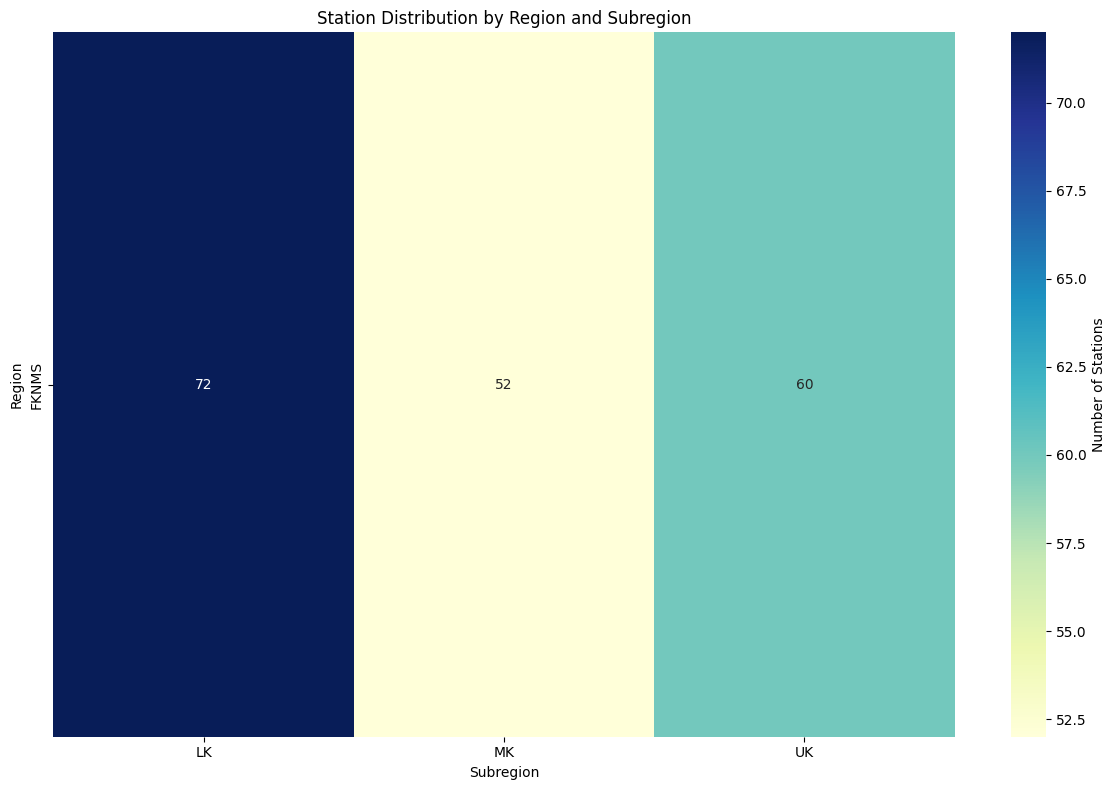

In [11]:
# Count the number of stations by Region and Subregion
stations_region_subregion = stations.groupby(['Region', 'Subregion']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(stations_region_subregion, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Number of Stations'})
plt.title("Station Distribution by Region and Subregion")
plt.xlabel("Subregion")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

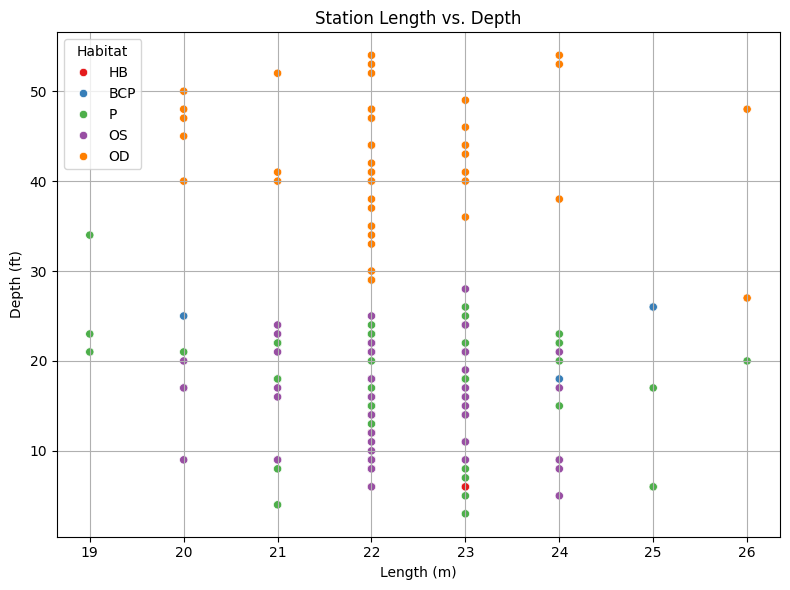

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_m', y='Depth_ft', data=stations, hue='Habitat', palette='Set1')
plt.title("Station Length vs. Depth")
plt.xlabel("Length (m)")
plt.ylabel("Depth (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()


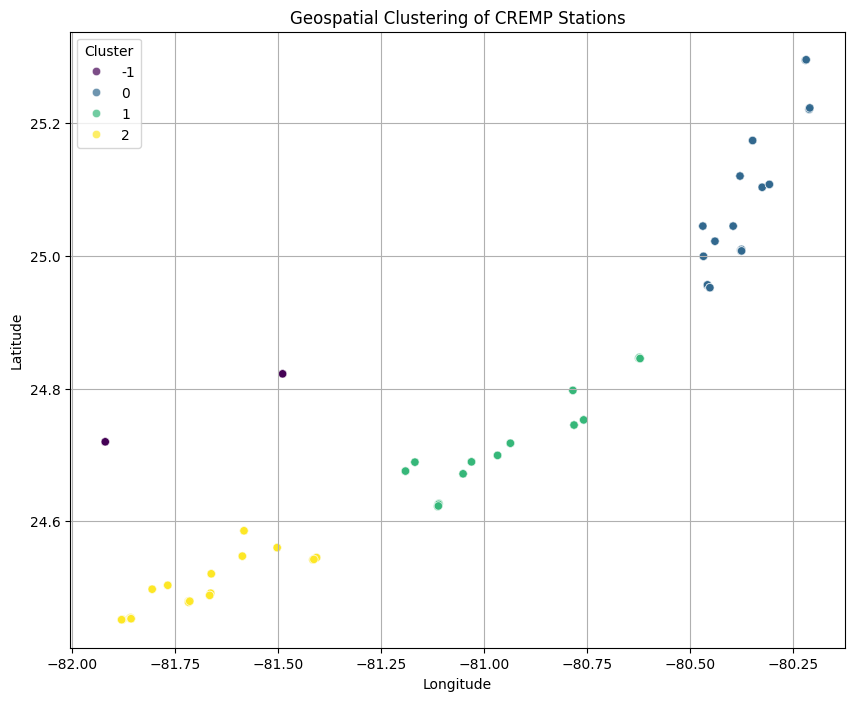

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare coordinates for clustering
coords = stations[['latDD', 'lonDD']].values
coords_scaled = StandardScaler().fit_transform(coords)

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(coords_scaled)
stations['Cluster'] = db.labels_

# Plot clustered stations
plt.figure(figsize=(10, 8))
sns.scatterplot(x='lonDD', y='latDD', hue='Cluster', data=stations, palette="viridis", legend="full", alpha=0.7)
plt.title("Geospatial Clustering of CREMP Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [20]:
# pip install Cartopy

C:\Users\yunus\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\yunus\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\yunus\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\yunus\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\yunus\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: Down

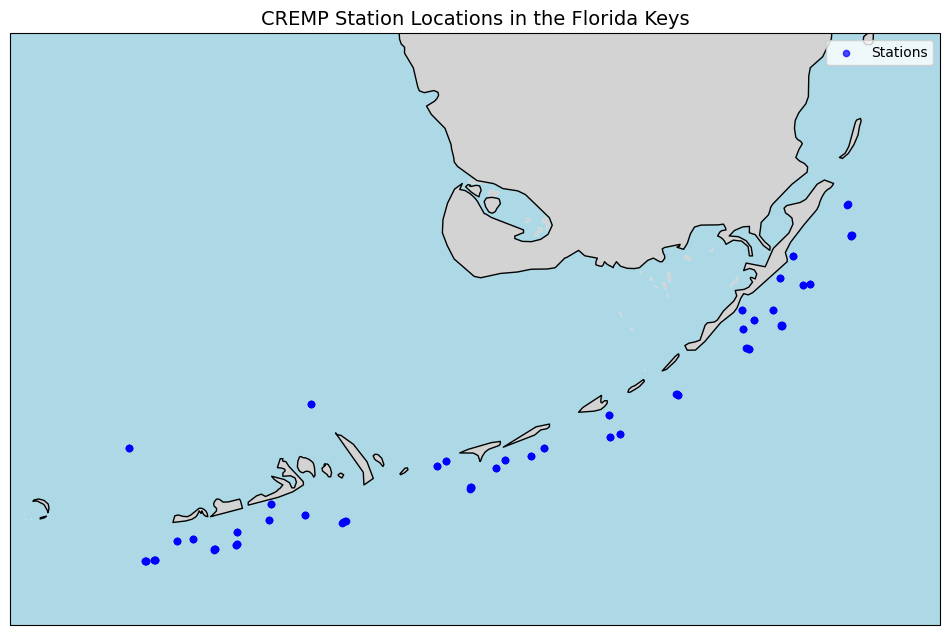

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point

# Create GeoDataFrame for station points
geometry = [Point(xy) for xy in zip(stations['lonDD'], stations['latDD'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs='EPSG:4326')

# Set up the map with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82.2, -80, 24.3, 25.7], crs=ccrs.PlateCarree())  # Florida Keys bounds

# Add base features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Plot stations
ax.scatter(gdf['lonDD'], gdf['latDD'], color='blue', s=20, alpha=0.7, transform=ccrs.PlateCarree(), label='Stations')

# Customize
plt.title('CREMP Station Locations in the Florida Keys', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\yunus\AppData\Local\Temp\ipykernel_11568\1022514248.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(subregions))


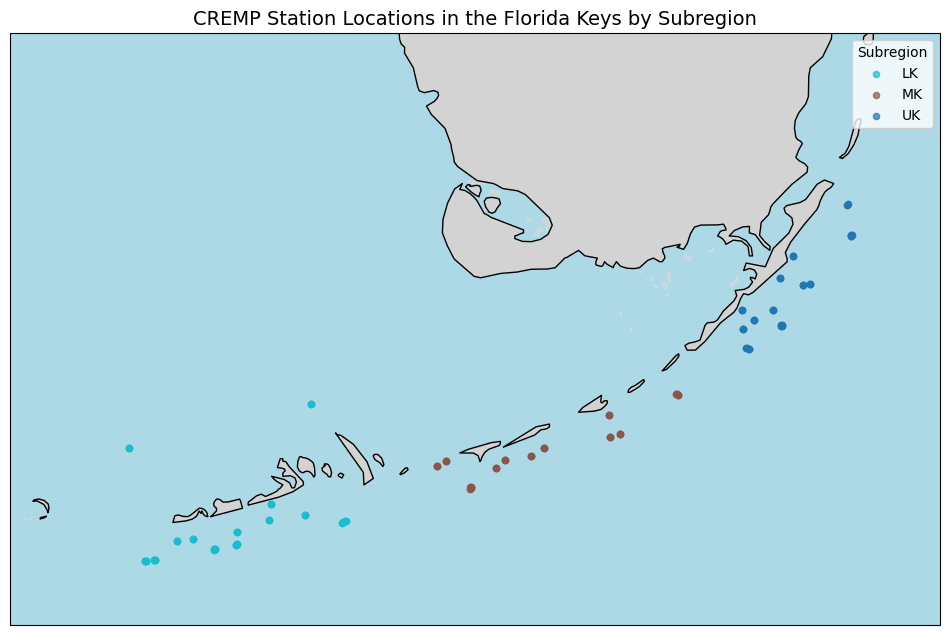

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create GeoDataFrame for station points
geometry = [Point(xy) for xy in zip(stations['lonDD'], stations['latDD'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs='EPSG:4326')

# Set up the map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82.2, -80, 24.3, 25.7], crs=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Create color map by Subregion
subregions = gdf['Subregion'].unique()
colors = cm.get_cmap('tab10', len(subregions))
color_dict = {subregion: colors(i) for i, subregion in enumerate(subregions)}

# Plot each Subregion
for subregion, group in gdf.groupby('Subregion'):
    ax.scatter(group['lonDD'], group['latDD'],
               color=color_dict[subregion], s=20, alpha=0.7,
               transform=ccrs.PlateCarree(), label=subregion)

# Customize
plt.title('CREMP Station Locations in the Florida Keys by Subregion', fontsize=14)
plt.legend(title='Subregion')
plt.grid(True)
plt.show()


C:\Users\yunus\AppData\Local\Temp\ipykernel_11568\772176337.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(habitats))


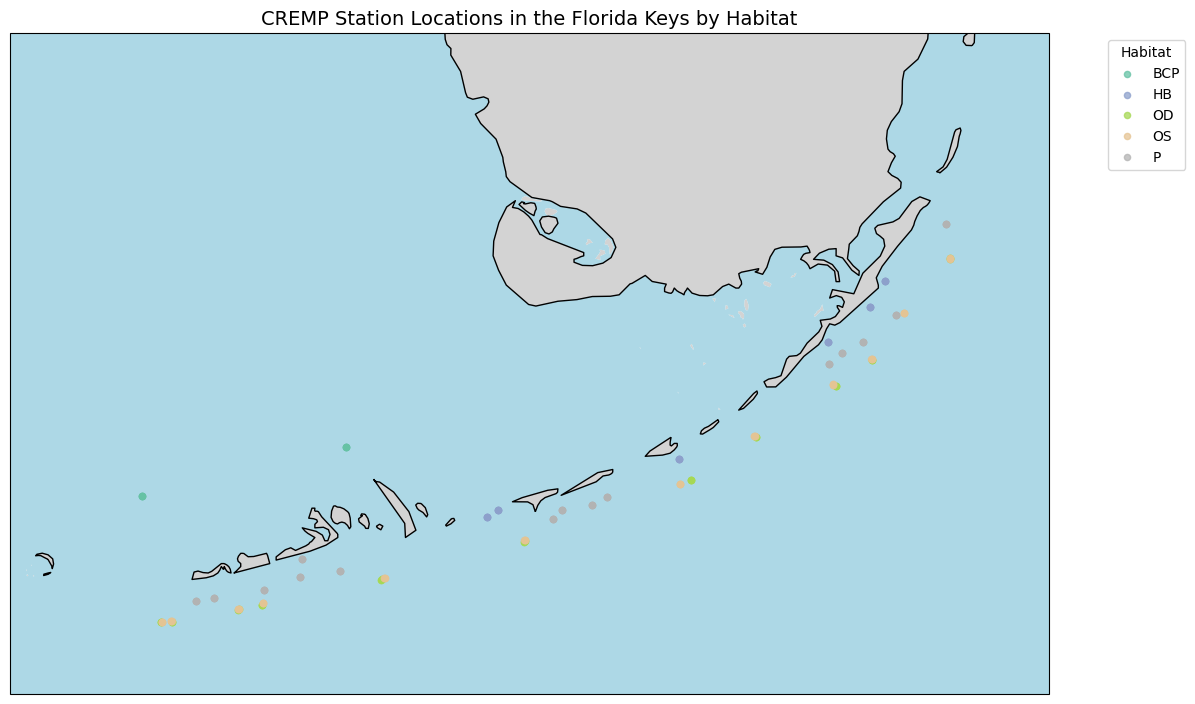

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create GeoDataFrame for station points
geometry = [Point(xy) for xy in zip(stations['lonDD'], stations['latDD'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs='EPSG:4326')

# Drop missing or invalid Habitat entries
gdf = gdf[gdf['Habitat'].notna()]
gdf['Habitat'] = gdf['Habitat'].astype(str).str.strip()

# Set up the map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82.2, -80, 24.3, 25.7], crs=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Generate color palette
habitats = sorted(gdf['Habitat'].unique())
cmap = cm.get_cmap('Set2', len(habitats))
color_dict = {habitat: cmap(i) for i, habitat in enumerate(habitats)}

# Plot each habitat
for habitat, group in gdf.groupby('Habitat'):
    ax.scatter(group['lonDD'], group['latDD'],
               color=color_dict[habitat], s=20, alpha=0.75,
               transform=ccrs.PlateCarree(), label=habitat)

# Customize
plt.title('CREMP Station Locations in the Florida Keys by Habitat', fontsize=14)
plt.legend(title='Habitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\yunus\AppData\Local\Temp\ipykernel_11568\1174024701.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab_colors = plt.cm.get_cmap('Set1', len(habitats))  # or 'tab20' if more than 10


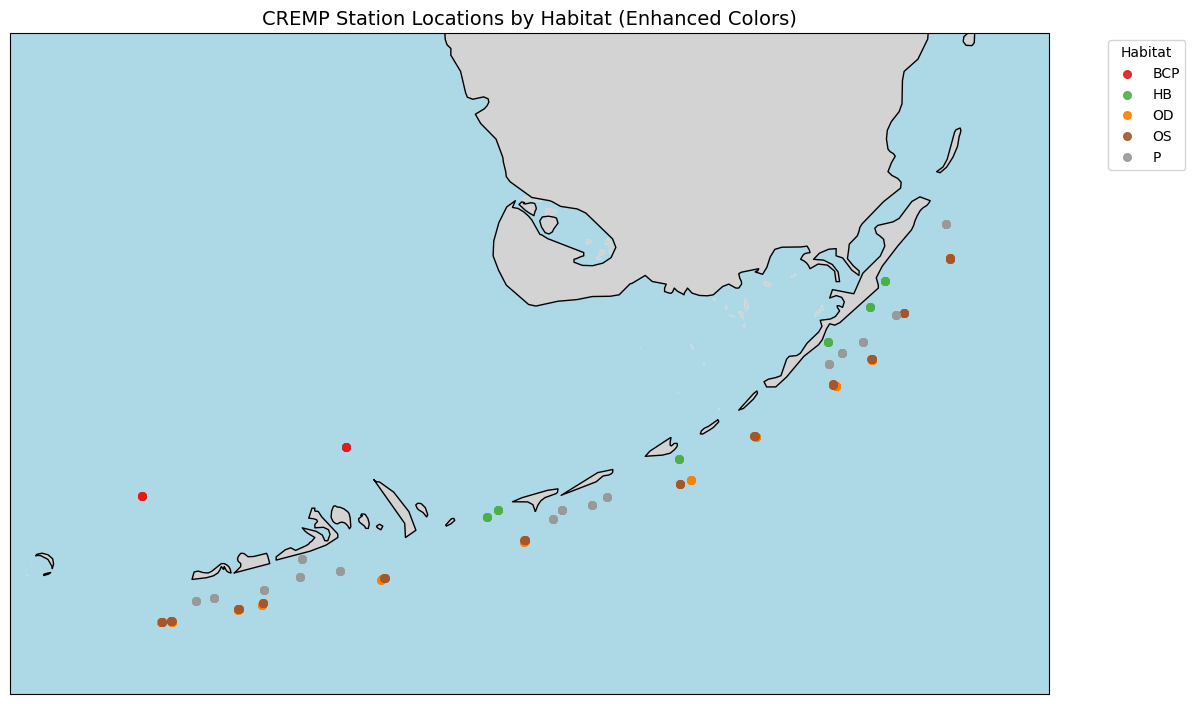

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(stations['lonDD'], stations['latDD'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs='EPSG:4326')

# Clean Habitat column
gdf = gdf[gdf['Habitat'].notna()]
gdf['Habitat'] = gdf['Habitat'].astype(str).str.strip()

# Set up map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82.2, -80, 24.3, 25.7], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Use 'tab10' or 'tab20' for distinct color palette
habitats = sorted(gdf['Habitat'].unique())
tab_colors = plt.cm.get_cmap('Set1', len(habitats))  # or 'tab20' if more than 10
color_dict = {hab: tab_colors(i) for i, hab in enumerate(habitats)}

# Plot each group
for habitat, group in gdf.groupby('Habitat'):
    ax.scatter(group['lonDD'], group['latDD'],
               color=color_dict[habitat], s=30, alpha=0.9,
               transform=ccrs.PlateCarree(), label=habitat)

# Styling
plt.title('CREMP Station Locations by Habitat (Enhanced Colors)', fontsize=14)
plt.legend(title='Habitat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
